In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.2 (1).csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
X=df[['GRE Score','TOEFL Score','SOP','CGPA','Research']]
y=df.COA

In [5]:
X

,GRE Score,TOEFL Score,SOP,CGPA,Research
0,337,118,4.5,9.65,1
1,324,107,4.0,8.87,1
2,316,104,3.0,8.00,1
3,322,110,3.5,8.67,1
4,314,103,2.0,8.21,0
...,...,...,...,...,...
495,332,108,4.5,9.02,1
496,337,117,5.0,9.87,1
497,330,120,4.5,9.56,1
498,312,103,4.0,8.43,0


In [6]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: COA, Length: 500, dtype: float64

<IPython.core.display.Javascript object>


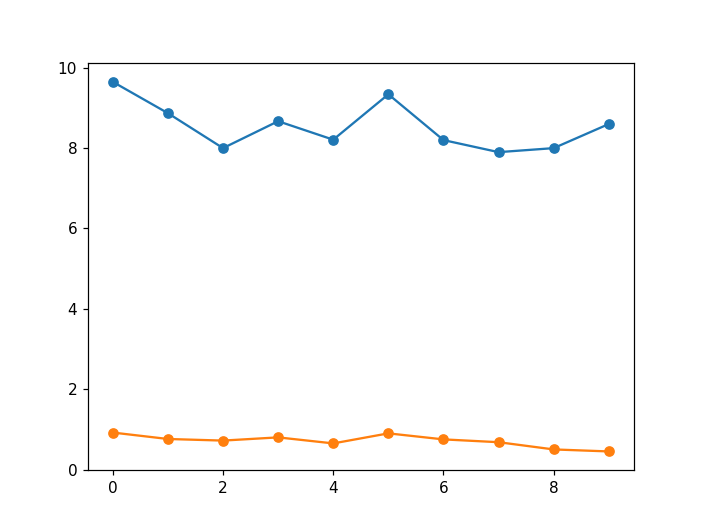

In [7]:
import numpy as np

ld =df['CGPA'].head(10)
ed =df.COA.head(10)

plt.figure()
plt.plot(ld, '-o', ed, '-o')

<IPython.core.display.Javascript object>


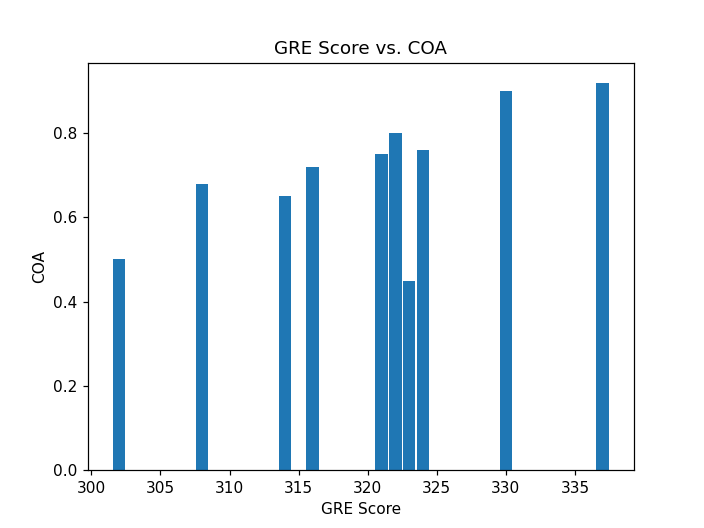

<BarContainer object of 10 artists>

In [8]:
plt.figure()
ax = plt.gca()
ax.set_xlabel('GRE Score')
ax.set_ylabel('COA')
ax.set_title('GRE Score vs. COA')
xvals=df['GRE Score'].head(10)
plt.bar(xvals,df.COA.head(10),width=0.9)

<IPython.core.display.Javascript object>


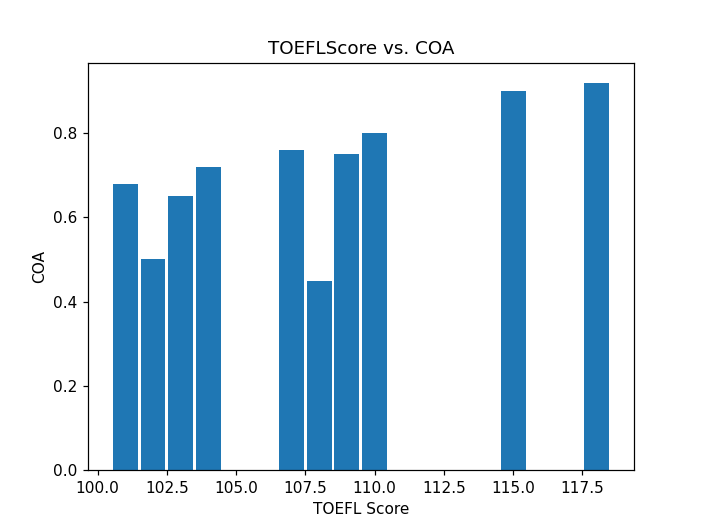

<BarContainer object of 10 artists>

In [9]:
plt.figure()
ax = plt.gca()
ax.set_xlabel('TOEFL Score')
ax.set_ylabel('COA')
ax.set_title('TOEFLScore vs. COA')
xvals=df['TOEFL Score'].head(10)
plt.bar(xvals,df.COA.head(10),width=0.9)

<IPython.core.display.Javascript object>


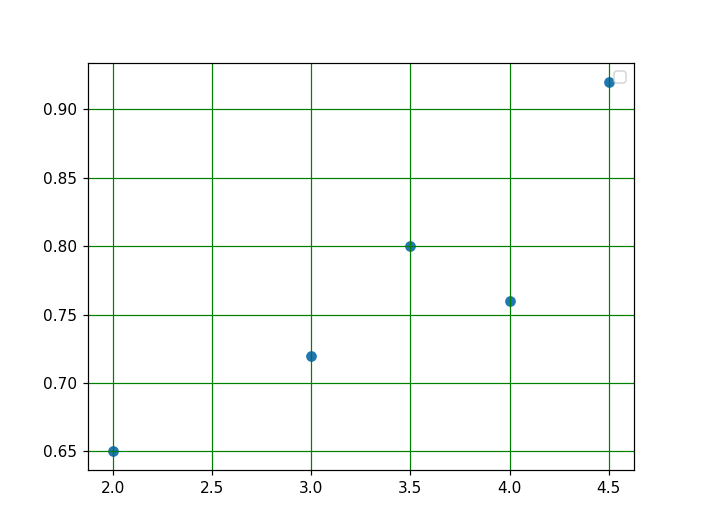

No handles with labels found to put in legend.


In [10]:
plt.figure()
x1=df['SOP'].head(5)
y1=df.COA.head(5)
plt.grid(True,color='g')
plt.scatter(x1,y1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


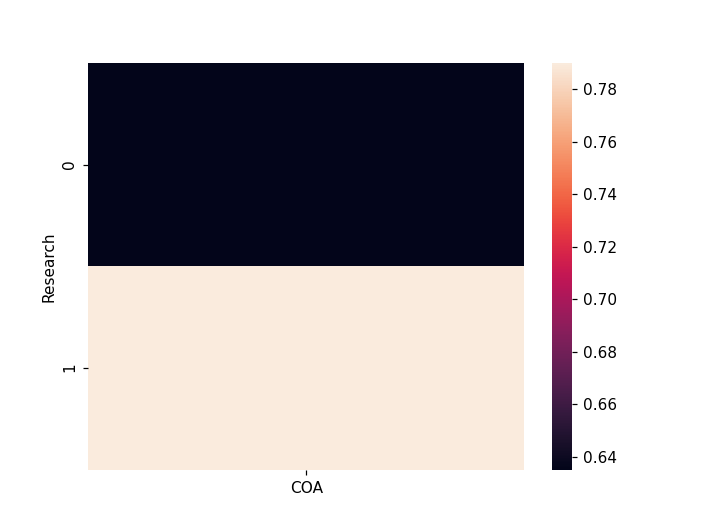

In [11]:
plt.figure()
cpivot=df.pivot_table(index="Research",values="COA")
ax = sns.heatmap(cpivot)

<IPython.core.display.Javascript object>


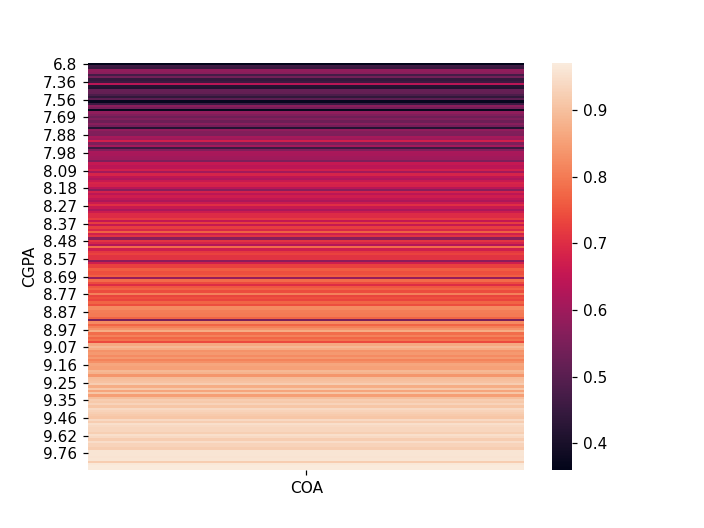

In [12]:
plt.figure()
cpivot=df.pivot_table(index="CGPA",values="COA")
ax = sns.heatmap(cpivot)

In [13]:
d=df[["GRE Score","TOEFL Score","SOP","CGPA","Research","COA"]]

In [14]:
X.shape

(500, 5)

In [15]:
y.shape

(500,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)


In [17]:
def heatMap(df):
    
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    
    
    plt.show()


<IPython.core.display.Javascript object>


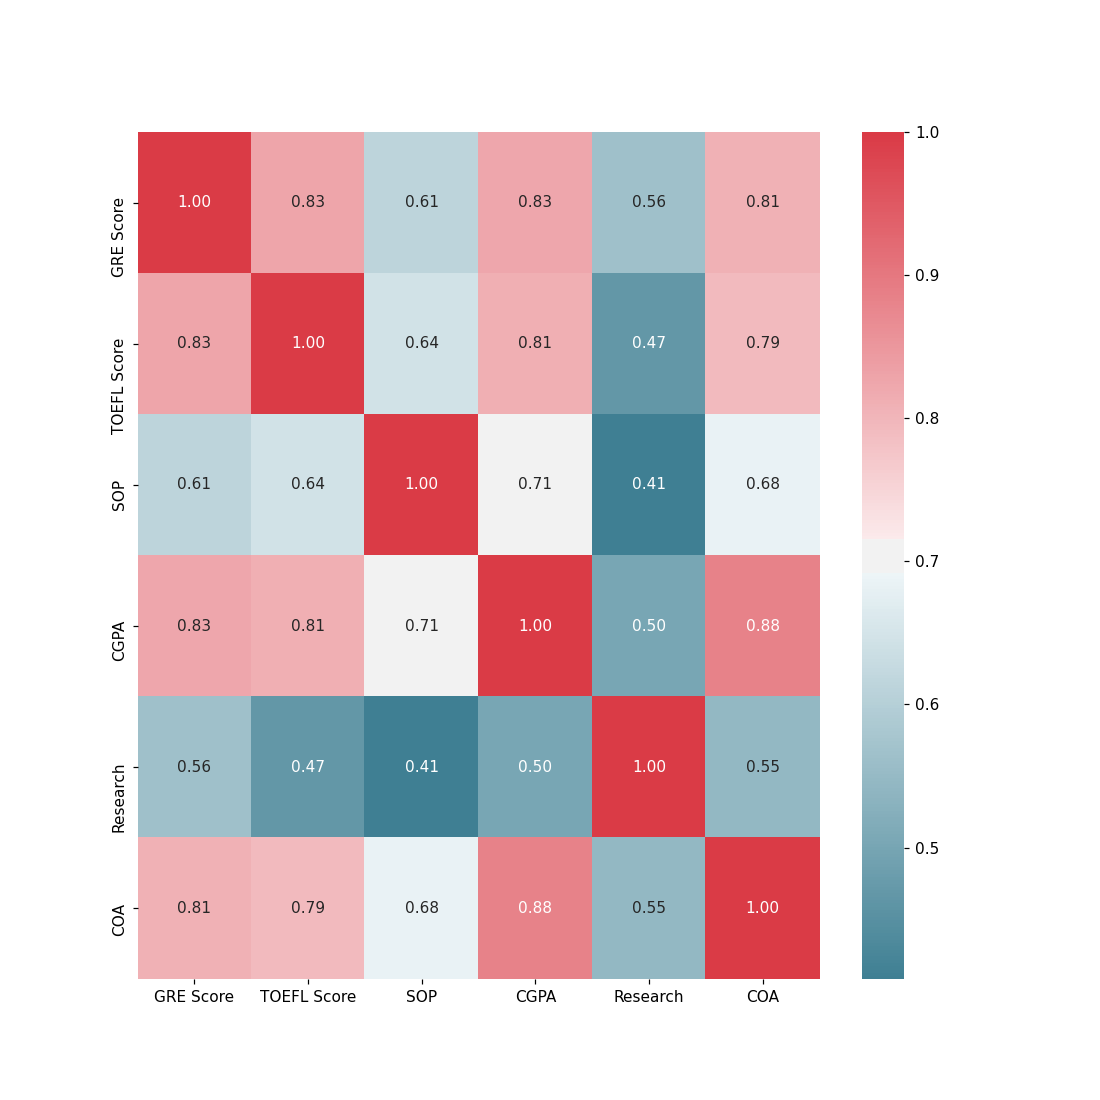

In [18]:
heatMap(d)

<IPython.core.display.Javascript object>


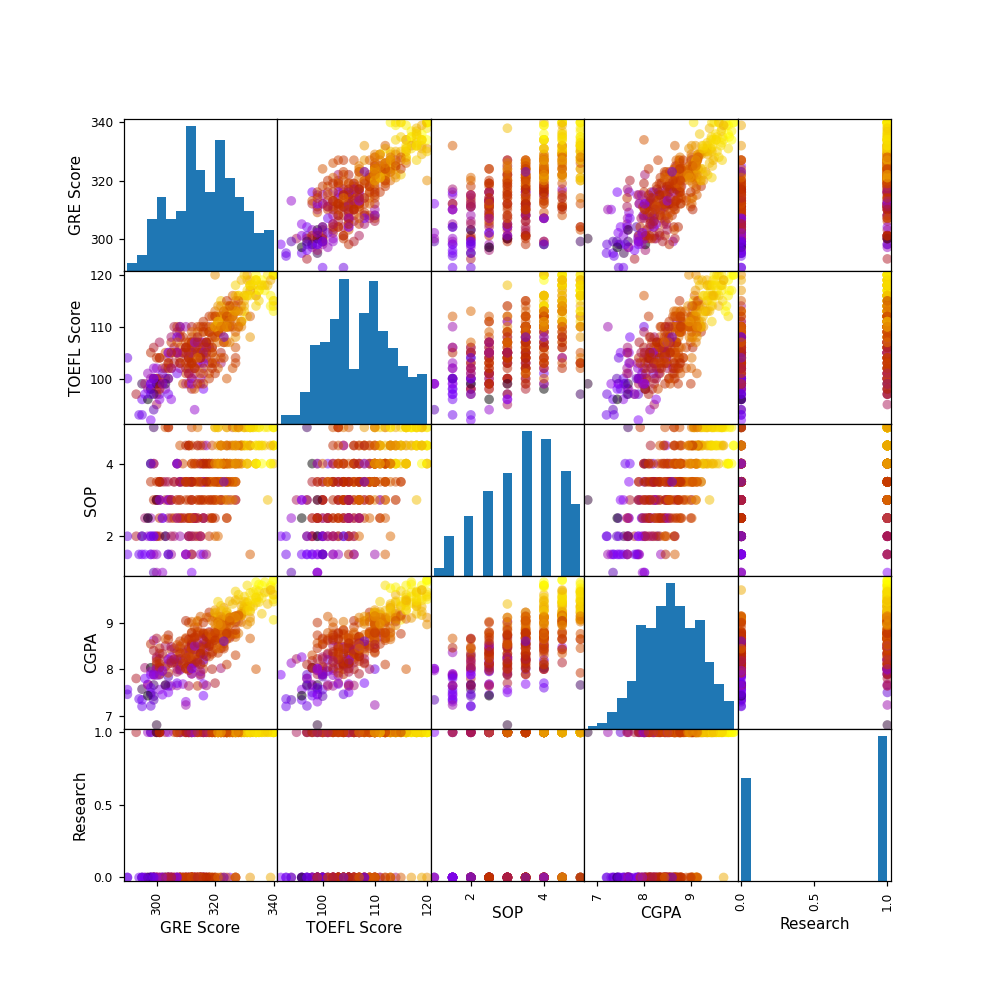

In [19]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
#pandas.tools.plotting.scatter_matrix(df, alpha=0.5, figsize=None, ax=None, 
# grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None(in this case bins:15),n, **kwds, (in this case 'cmap')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


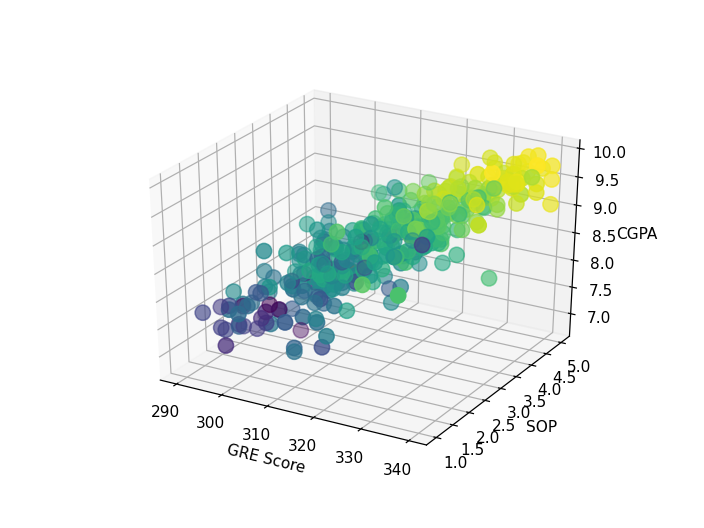

In [20]:
cmap = cm.get_cmap('gnuplot')
cmap
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')                           
ax.scatter(X_train['GRE Score'], X_train['SOP'], X_train['CGPA'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('GRE Score')
ax.set_ylabel('SOP')
ax.set_zlabel('CGPA')
plt.show()

# KNN REGRESSOR

In [21]:
from sklearn.neighbors import KNeighborsRegressor


knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[0.73  0.872 0.8   0.87  0.606 0.684 0.534 0.642 0.576 0.762 0.678 0.726
 0.638 0.708 0.906 0.468 0.816 0.638 0.804 0.664 0.526 0.726 0.532 0.926
 0.842 0.716 0.762 0.606 0.546 0.544 0.65  0.512 0.666 0.82  0.696 0.552
 0.826 0.86  0.62  0.64  0.65  0.866 0.918 0.738 0.812 0.794 0.93  0.816
 0.648 0.714 0.642 0.638 0.628 0.806 0.678 0.864 0.544 0.83  0.612 0.63
 0.442 0.878 0.626 0.87  0.752 0.638 0.784 0.86  0.494 0.798 0.912 0.74
 0.676 0.734 0.894 0.942 0.796 0.716 0.516 0.676 0.642 0.818 0.608 0.708
 0.82  0.564 0.762 0.658 0.528 0.794 0.732 0.834 0.612 0.69  0.61  0.936
 0.59  0.632 0.626 0.608 0.938 0.754 0.936 0.668 0.752 0.678 0.822 0.822
 0.64  0.728 0.504 0.624 0.618 0.592 0.608 0.86  0.586 0.942 0.824 0.916
 0.668 0.804 0.9   0.892 0.696]
R-squared test score: 0.720


In [22]:
X_train.shape

(375, 5)

In [23]:
X_test.shape

(125, 5)

In [24]:
y_train.shape

(375,)

In [25]:
y_test.shape

(125,)

# LINEAR REGRESSION


In [26]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [0.00203909 0.00273575 0.01150513 0.12975436 0.02593185]
linear model intercept (b): -1.384
R-squared score (training): 0.819
R-squared score (test): 0.796


In [27]:
y_pred = linreg.predict(X_test.head(2))
y_pred

array([0.65387864, 0.81165534])

# RIDGE REGRESSION

In [28]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('University data set')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

University data set
ridge regression linear model intercept: -1.5461959976122701
ridge regression linear model coeff:
[0.00333624 0.00415488 0.0175384  0.08102205 0.02155746]
R-squared score (training): 0.808
R-squared score (test): 0.785
Number of non-zero features: 5


In [29]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 0, r-squared training: 0.82, r-squared test: 0.80

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.82, r-squared test: 0.80

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.81, r-squared test: 0.79

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.81, r-squared test: 0.78

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.79, r-squared test: 0.77

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.78, r-squared test: 0.75

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.73, r-squared test: 0.70



# Lasso

In [30]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

linlasso = Lasso(alpha=20.0).fit(X_train, y_train)

print('University data set')
print('Lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('Lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))

University data set
Lasso regression linear model intercept: 0.7262933333333333
Lasso regression linear model coeff:
[0. 0. 0. 0. 0.]
R-squared score (training): 0.000
R-squared score (test): -0.018
Number of non-zero features: 0


# Random

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

clf = RandomForestRegressor().fit(X_train, y_train)
print('University dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

University dataset
Accuracy of RF classifier on training set: 0.97
Accuracy of RF classifier on test set: 0.79


In [32]:
z=[clf.score(X_test, y_test),linridge.score(X_test, y_test),linreg.score(X_test, y_test),knnreg.score(X_test, y_test)]

In [33]:
z

[0.7878099935696867,
 0.6972267057092734,
 0.7959018834575936,
 0.7202049687922689]

<IPython.core.display.Javascript object>


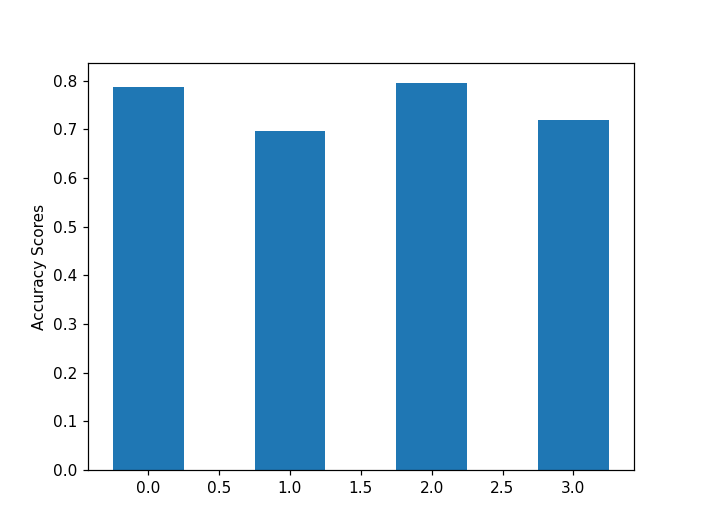

<BarContainer object of 4 artists>

In [34]:
plt.figure()
ax = plt.gca()
#ax.set_xlabel('TOEFL Score')
#ax.set_ylabel('COA')
#ax.set_title('TOEFLScore vs. COA')
xvals=range(len(z))
k=['Random','Ridge','LinearReg','KNNReg']
plt.ylabel('Accuracy Scores')
plt.bar(xvals,z,width=0.5)


In [35]:
#"GRE Score","TOEFL Score","SOP","CGPA","Research","COA"
X_test

,GRE Score,TOEFL Score,SOP,CGPA,Research
90,318,106,4.0,7.92,1
254,321,114,4.0,9.12,0
283,321,111,2.5,8.90,1
445,328,116,4.5,9.08,1
461,301,102,2.5,8.13,1
...,...,...,...,...,...
430,311,104,4.0,8.13,1
49,327,111,3.0,8.40,1
134,333,113,4.0,9.28,1
365,330,114,4.5,9.17,1


In [36]:
import tkinter
from tkinter import Button
from tkinter import Entry
window = tkinter.Tk()
 
# to rename the title of the window 
window.title("University entry prediction")
window.geometry('600x500') 
# pack is used to show the object in the window
 
label = tkinter.Label(window, text = "university entry predicter" ,font=("Arial Bold", 30))
label.grid(column=10,row=0)
label = tkinter.Label(window, text = "Machine to Predict University Entry" ,font=("Arial Bold", 10))
label.grid(column=10,row=1)


label1 = tkinter.Label(window,text = "GRE Score")
label1.grid(column=10,row=12)
txt1 = Entry(window,width=60) 
txt1.grid(column=10,row=13)

label3 = tkinter.Label(window,text = "TOEFL Score")
label3.grid(column=10,row=14)
txt2 = Entry(window,width=60) 
txt2.grid(column=10,row=15)

label4 = tkinter.Label(window,text = "SOP")
label4.grid(column=10,row=16)
txt3 = Entry(window,width=60)
txt3.grid(column=10,row=17)

label5 = tkinter.Label(window,text = "CGPA")
label5.grid(column=10,row=18)
txt4 = Entry(window,width=60)
 
txt4.grid(column=10,row=19)
label6 = tkinter.Label(window,text = "Research")
label6.grid(column=10,row=20)
txt5 = Entry(window,width=60) 
txt5.grid(column=10,row=21)







def clicked():
    
 
     
     
      p1= txt1.get()
      p2= txt2.get()
      p3= txt3.get()
      p4= txt4.get()
      p5= txt5.get()
      #p6= txt6.get()
      #p7= txt7.get()
      #p8= txt8.get()
      #p9= txt9.get()
      #p10= txt10.get()
      #p11= txt11.get()
      #p12= txt12.get()
      #p13= txt13.get()
      
     
      
      
      #x_test[0]=(p1,p2,p3,p4,p5,p6,p7)
      ColNameList1 = ["GRE Score","TOEFL Score","SOP","CGPA","Research"]
      X_test.loc[90,ColNameList1[0]]=p1
      X_test.loc[90,ColNameList1[1]]=p2
      X_test.loc[90,ColNameList1[2]]=p3
      X_test.loc[90,ColNameList1[3]]=p4
      X_test.loc[90,ColNameList1[4]]=p5
      #x_test.loc[1747,ColNameList1[5]]=p6
      #x_test.loc[1747,ColNameList1[6]]=p7
      
      a=linreg.predict(X_test)
      w=a[0]
      
      
      winners=w

      label11 = tkinter.Label(window,text =winners)
      label11.grid(column=10,row=38)
      #label11.configure(text="not elligible for drinking")
          
   
      
      
      
      
      
      
bt = Button (window, text="Enter", command=clicked)

bt.grid (column=10, row=36)


window.mainloop()

  

C:\Users\raju\.conda\envs\R\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
